#**Countries of the World and population**
I scraped world countries and their population data from Worldometer (https://www.worldometers.info/world-population/population-by-country/
) using Requests and BeautifulSoup to fetch the data, and applied Pandas for cleaning and exploratory data analysis (EDA). For visualization, I used Matplotlib and Seaborn.

The dataset includes the following columns:

Country/Dependency : Name of the country or dependent territory.

Population (2025 est.) : Estimated total population of the country in the current year.

Yearly Change (%) : Percentage change in population compared to the previous year.

Net Change : Absolute number of people added or lost in population during the year.

Density (P/Km²) : Population density, i.e., number of people per square kilometer.

Land Area (Km²) : Total land area of the country in square kilometers.

Migrants (net) : Net number of migrants (positive = more people entering, negative = more people leaving).

Fertility Rate : Average number of children born per woman.

Median Age : The age at which half the population is older and half is younger.

Urban Pop % : Percentage of the population living in urban areas.

World Share (%) : Share of the country’s population relative to the world population.

In [1]:
import requests

from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
url = "https://www.worldometers.info/world-population/population-by-country/"
headers = {"user-agent":"countriespopulationbot"}

response = requests.get(url, headers=headers)
response.status_code

200

In [3]:
soup = bs(response.text,"html.parser")

soup.title

<title>Population by Country (2025) - Worldometer</title>

In [4]:
c_table = soup.find_all(name="table",attrs={"class":"datatable"})


In [5]:

table = c_table[0]

headers = [th.get_text(strip=True) for th in table.find("thead").find_all("th")]

rows = []
for tr in table.find("tbody").find_all("tr"):

    row = [td.get_text(strip=True) for td in tr.find_all("td")]
    rows.append(row)


df = pd.DataFrame(rows, columns=headers)



df.head()


,#,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","â495,753",1.94,28.8,37.1%,17.78%
1,2,China,"1,416,096,094",â0.23%,"â3,225,184",151,"9,388,211","â268,126",1.02,40.1,67.5%,17.20%
2,3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
3,4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","â39,509",2.1,30.4,59.6%,3.47%
4,5,Pakistan,"255,219,554",1.57%,"3,950,390",331,"770,880","â1,235,336",3.5,20.6,34.4%,3.10%


#**Data Cleaning Process**
After scraping the raw data, the dataset contains several inconsistencies and non-numeric characters that will make analysis difficult. To prepare it for EDA, I performed the following steps using Pandas:

**Removed unwanted characters**: Stripped out symbols like %, commas ,, negative signs encoded as â, and text artifacts from numerical columns.

**Converted data types**: Changed columns such as Population, Yearly Change, Net Change, Density, Land Area, Migrants, Fertility Rate, Median Age, Urban Pop (%), and World Share (%) from strings to appropriate numeric types (int or float).

**Standardized column formats**:Ensured numerical values were in a consistent format (e.g., -4000 instead of "− 4,000").

Verified data integrity: Confirmed that all transformations preserved the accuracy of the original dataset.

This cleaning process transformed messy scraped data into a structured, analysis-ready format.

In [6]:
# renaming the column
df.rename(columns ={"#":"Rank",
                  "Country (or dependency)":"Country_Dependecy",
                   "Population 2025":"2025_Population_est",
                   "Yearly Change":"Yearly_change",
                    "Net Change":"Net_change",
                    "Density (P/KmÂ²)":"Density_sqKm",
                    "Land Area (KmÂ²)":"Land_area_sqKm",
                     "Migrants (net)":"Net_migrants",
                      "Fert. Rate":"Fertility_rate",
                    'Median Age':"Median_age",
                    'Urban Pop %':"Percent_urban_pop",
                    'World Share':"Percent_world_share"}, inplace=True)

In [7]:
# checking data type
df.dtypes

,0
Rank,object
Country_Dependecy,object
2025_Population_est,object
Yearly_change,object
Net_change,object
Density_sqKm,object
Land_area_sqKm,object
Net_migrants,object
Fertility_rate,object
Median_age,object


In [8]:
#only country/dependecy and density columns has to be object, the rest integer or float
df["Rank"]=df.Rank.astype("int")
df["2025_Population_est"] = df["2025_Population_est"].str.replace(",","",regex=False).astype("int")
df["Density_sqKm"] = df["Density_sqKm"].str.replace(",","",regex=False).astype("int")
df.set_index("Rank",inplace=True)

In [9]:
df['Land_area_sqKm']= df['Land_area_sqKm'].str.replace(",","",regex=False).astype("int")
df["Fertility_rate"] = df["Fertility_rate"].astype("float")
df['Median_age'] = df['Median_age'].astype("float")
df['Percent_urban_pop'] = df['Percent_urban_pop'].str.replace("%","",regex=False).replace("", np.nan).astype("float")
df['Percent_world_share'] = df['Percent_world_share'].str.replace("%","",regex=False).replace("", np.nan).astype("float")

In [10]:
df["Yearly_change"] = pd.to_numeric(
    df["Yearly_change"].replace({"â": "-", "%": ""}, regex=True),
    errors="coerce"
)

df["Net_change"] = pd.to_numeric(
    df["Net_change"].replace({"â": "-", ",": ""}, regex=True),
    errors="coerce"
)

df["Net_migrants"] = pd.to_numeric(
    df["Net_migrants"].replace({"â": "-", ",": ""}, regex=True),
    errors="coerce"
)


#**Exploratory Data Analysis & Visualization**

In [11]:
# shape of the data
df.shape

(233, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 1 to 233
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Dependecy    233 non-null    object 
 1   2025_Population_est  233 non-null    int64  
 2   Yearly_change        233 non-null    float64
 3   Net_change           233 non-null    int64  
 4   Density_sqKm         233 non-null    int64  
 5   Land_area_sqKm       233 non-null    int64  
 6   Net_migrants         233 non-null    int64  
 7   Fertility_rate       233 non-null    float64
 8   Median_age           233 non-null    float64
 9   Percent_urban_pop    210 non-null    float64
 10  Percent_world_share  233 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 21.8+ KB


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
2025_Population_est,233.0,3.532080e+07,1.391905e+08,5.010000e+02,466330.0000,5731206.00,2.407458e+07,1.463866e+09
Yearly_change,233.0,8.866524e-01,1.270946e+00,-3.390000e+00,-0.0400,0.83,1.850000e+00,4.070000e+00
Net_change,233.0,2.989357e+05,1.076330e+06,-3.225184e+06,-32.0000,17879.00,2.131530e+05,1.292973e+07
Density_sqKm,233.0,4.876738e+02,2.412938e+03,0.000000e+00,38.0000,98.00,2.560000e+02,2.573200e+04
Land_area_sqKm,233.0,5.583427e+05,1.694270e+06,0.000000e+00,2830.0000,82200.00,4.103400e+05,1.637687e+07
Net_migrants,233.0,8.673820e+01,1.848009e+05,-1.235336e+06,-12730.0000,-581.00,1.866000e+03,1.702358e+06
Fertility_rate,233.0,2.306094e+00,1.134316e+00,6.900000e-01,1.4700,1.94,2.950000e+00,5.940000e+00
Median_age,233.0,3.189700e+01,9.860936e+00,1.450000e+01,22.9000,32.80,3.980000e+01,5.740000e+01
Percent_urban_pop,210.0,6.075905e+01,2.255965e+01,1.150000e+01,42.8000,62.05,8.017500e+01,9.980000e+01
Percent_world_share,233.0,4.292269e-01,1.690691e+00,6.100000e-06,0.0057,0.07,2.900000e-01,1.778000e+01


In [14]:
import plotly.graph_objects as go

world_pop_estimate = df["2025_Population_est"].sum()


fig = go.Figure(go.Indicator(
    mode = "number",
    value = world_pop_estimate,
    title = {"text": "World Population Estimate 2025"},
    number = {"valueformat": ","}
))
fig.update_layout(width=500, height=300)

fig.show()


 The World Estimate Population as of 2025 is: **8,229,745,543**



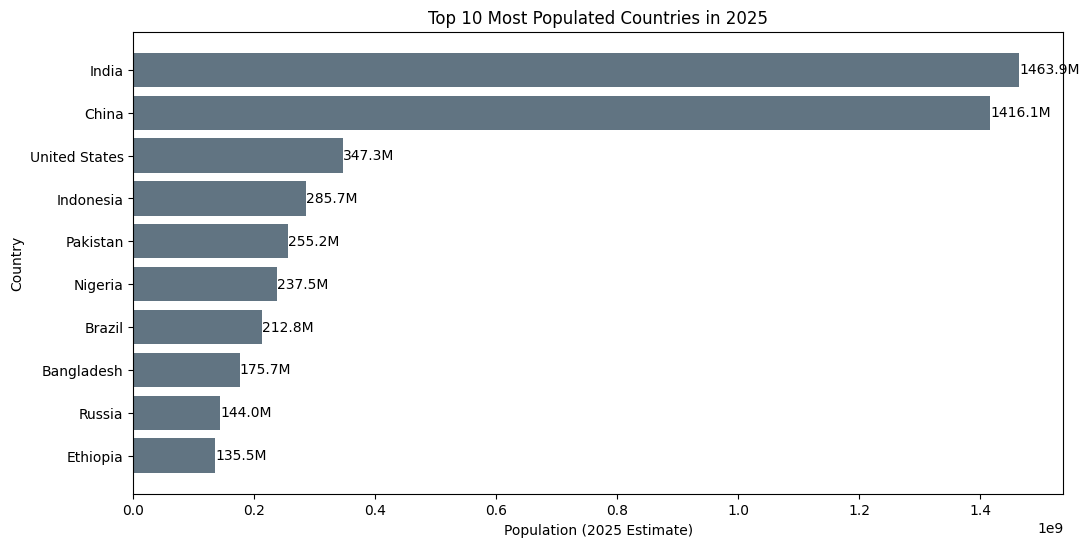

In [15]:
# top 5 highly populated countries
top_populated_country = df[['Country_Dependecy','2025_Population_est']].sort_values(by='2025_Population_est',ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.barh(top_populated_country['Country_Dependecy'],
                top_populated_country['2025_Population_est'],
                color="#617482")

plt.xlabel("Population (2025 Estimate)")
plt.ylabel("Country")
plt.title("Top 10 Most Populated Countries in 2025")


plt.gca().invert_yaxis()


for bar in bars:
    plt.text(bar.get_width(),
             bar.get_y() + bar.get_height()/2,
             f"{bar.get_width()/1e6:.1f}M",
             va='center')

plt.show()

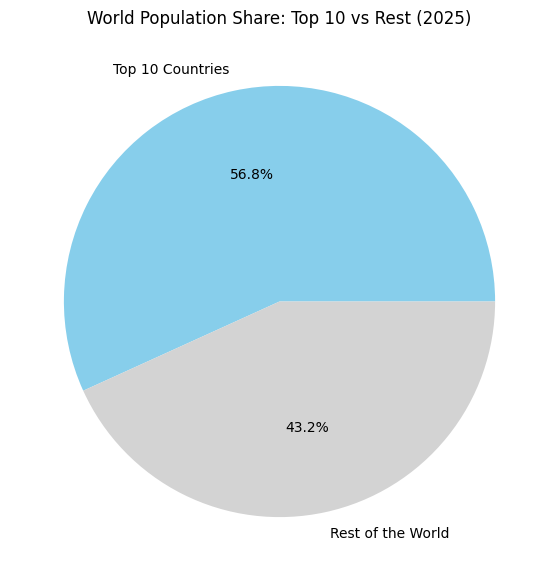

In [16]:
top10 = df.nlargest(10, '2025_Population_est')
rest = df['2025_Population_est'].sum() - top10['2025_Population_est'].sum()

sizes = [top10['2025_Population_est'].sum(), rest]
labels = ['Top 10 Countries', 'Rest of the World']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue','lightgray'])
plt.title("World Population Share: Top 10 vs Rest (2025)")
plt.show()


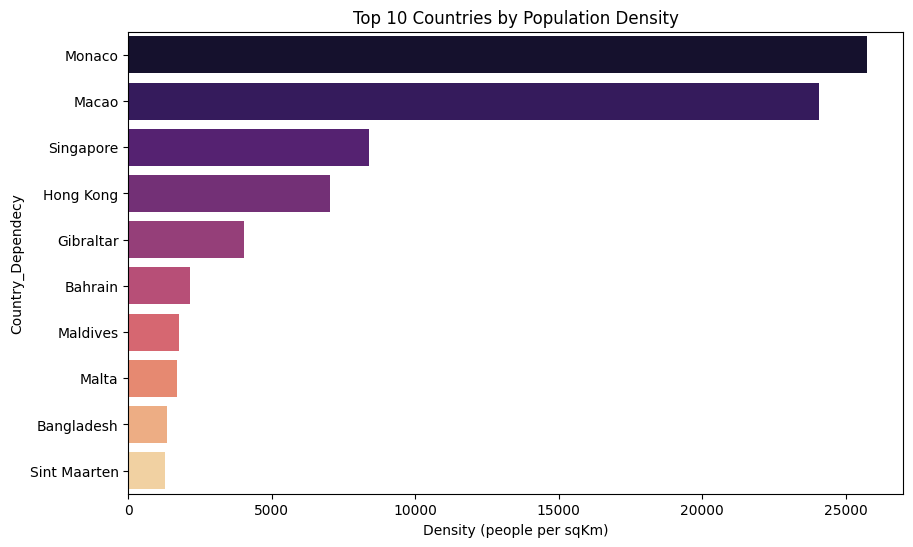

In [17]:
top_density = df.nlargest(10, 'Density_sqKm')[['Country_Dependecy','Density_sqKm']]

plt.figure(figsize=(10,6))
sns.barplot(x='Density_sqKm', y='Country_Dependecy', data=top_density, palette='magma')
plt.title("Top 10 Countries by Population Density")
plt.xlabel("Density (people per sqKm)")
plt.show()


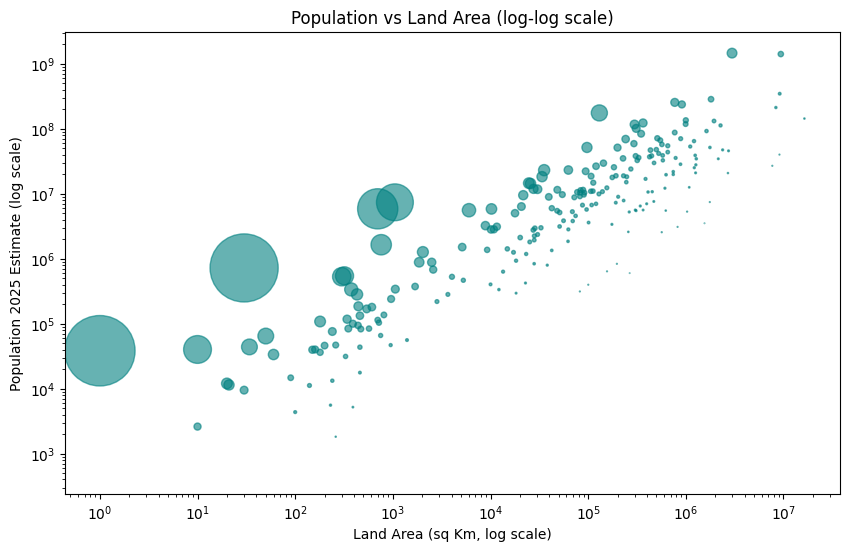

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df['Land_area_sqKm'], df['2025_Population_est'],
              s=df['Density_sqKm']/10,
            alpha=0.6, c='teal')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Land Area (sq Km, log scale)")
plt.ylabel("Population 2025 Estimate (log scale)")
plt.title("Population vs Land Area (log-log scale)")

plt.show()

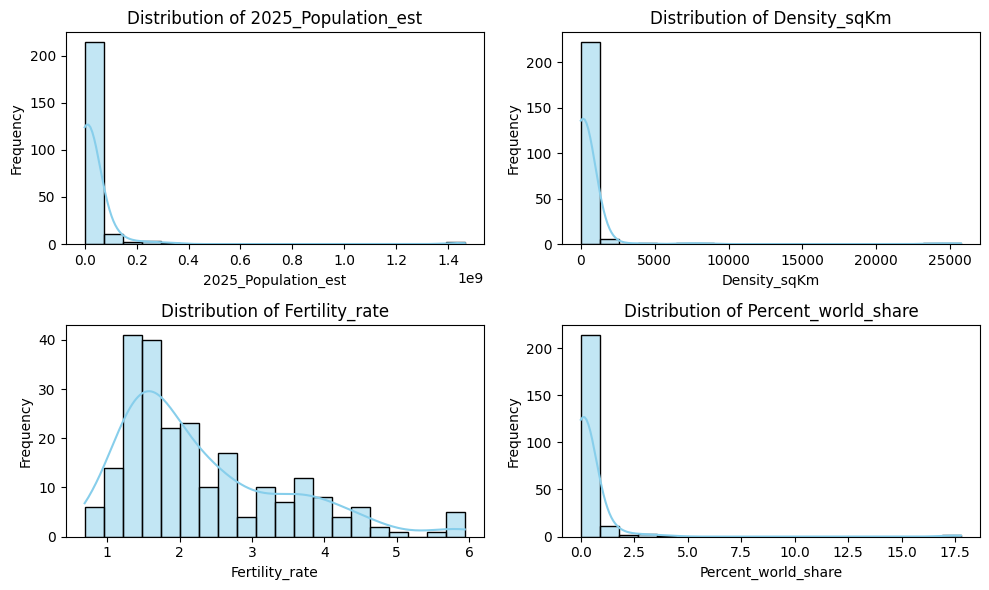

In [19]:
cols = ["2025_Population_est", "Density_sqKm", "Fertility_rate", "Percent_world_share"]

plt.figure(figsize=(10,6))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

2025 Population Estimate: Most countries have relatively small populations, while only a few (like China, India, U.S.) have extremely large populations, creating a right-skewed distribution.

Density (sqKm): The distribution is strongly right-skewed. Most countries have relatively low to moderate population densities, while a few (such as Macao and Monaco) have extremely high densities. These outliers create a long tail on the right side of the distribution.

Fertility Rate: More balanced but slightly right-skewed. Most countries fall between 1–3 children per woman, while fewer countries have very high fertility rates (4–6).

Percentage of World Share: Strongly right-skewed. The majority of countries contribute less than 1% to the world’s population, while only a few large nations contribute significantly (up to ~18%).



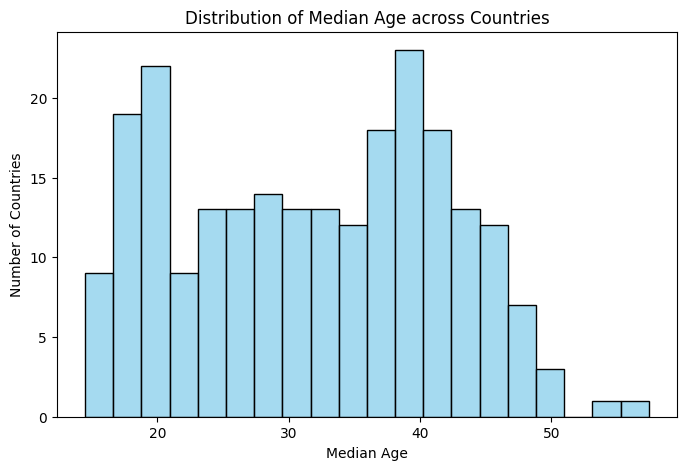

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Median_age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Median Age")
plt.ylabel("Number of Countries")
plt.title("Distribution of Median Age across Countries")
plt.show()



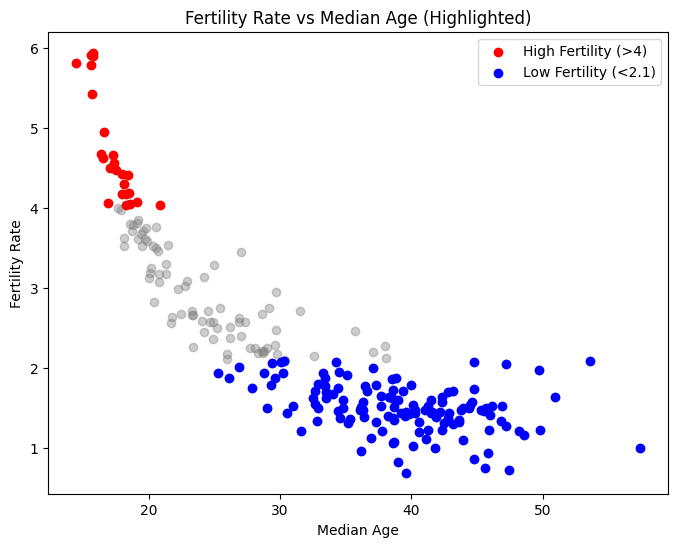

In [21]:
plt.figure(figsize=(8,6))

# High fertility countries
high = df[df['Fertility_rate'] > 4]
# Low fertility
low = df[df['Fertility_rate'] < 2.1]


plt.scatter(df['Median_age'], df['Fertility_rate'], alpha=0.4, color='gray')
plt.scatter(high['Median_age'], high['Fertility_rate'], color='red', label='High Fertility (>4)')
plt.scatter(low['Median_age'], low['Fertility_rate'], color='blue', label='Low Fertility (<2.1)')

plt.xlabel("Median Age")
plt.ylabel("Fertility Rate")
plt.title("Fertility Rate vs Median Age (Highlighted)")
plt.legend()
plt.show()


In [22]:
print("Countries with high fertility rate\n")
high_fertility=df.sort_values('Fertility_rate', ascending=False).head(5)
high_fertility[["Country_Dependecy",'Fertility_rate']]


Countries with high fertility rate



,Country_Dependecy,Fertility_rate
Rank,,
64,Chad,5.94
67,Somalia,5.91
15,DR Congo,5.90
121,Central African Republic,5.81
54,Niger,5.79


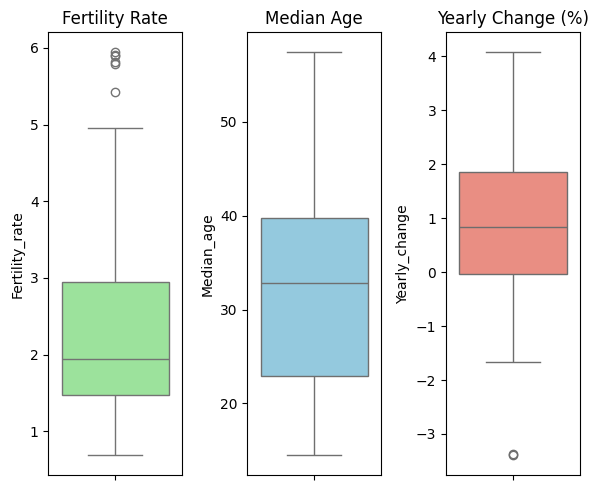

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(6,5))

sns.boxplot(y=df['Fertility_rate'], ax=axes[0], color='lightgreen')
axes[0].set_title("Fertility Rate")

sns.boxplot(y=df['Median_age'], ax=axes[1], color='skyblue')
axes[1].set_title("Median Age")

sns.boxplot(y=df['Yearly_change'], ax=axes[2], color='salmon')
axes[2].set_title("Yearly Change (%)")

plt.tight_layout()
plt.show()


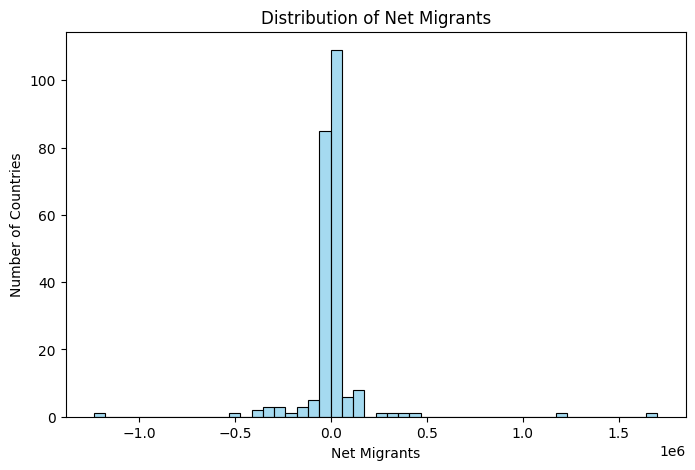

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['Net_migrants'], bins=50, kde=False, color='skyblue')
plt.title("Distribution of Net Migrants")
plt.xlabel("Net Migrants")
plt.ylabel("Number of Countries")
plt.show()

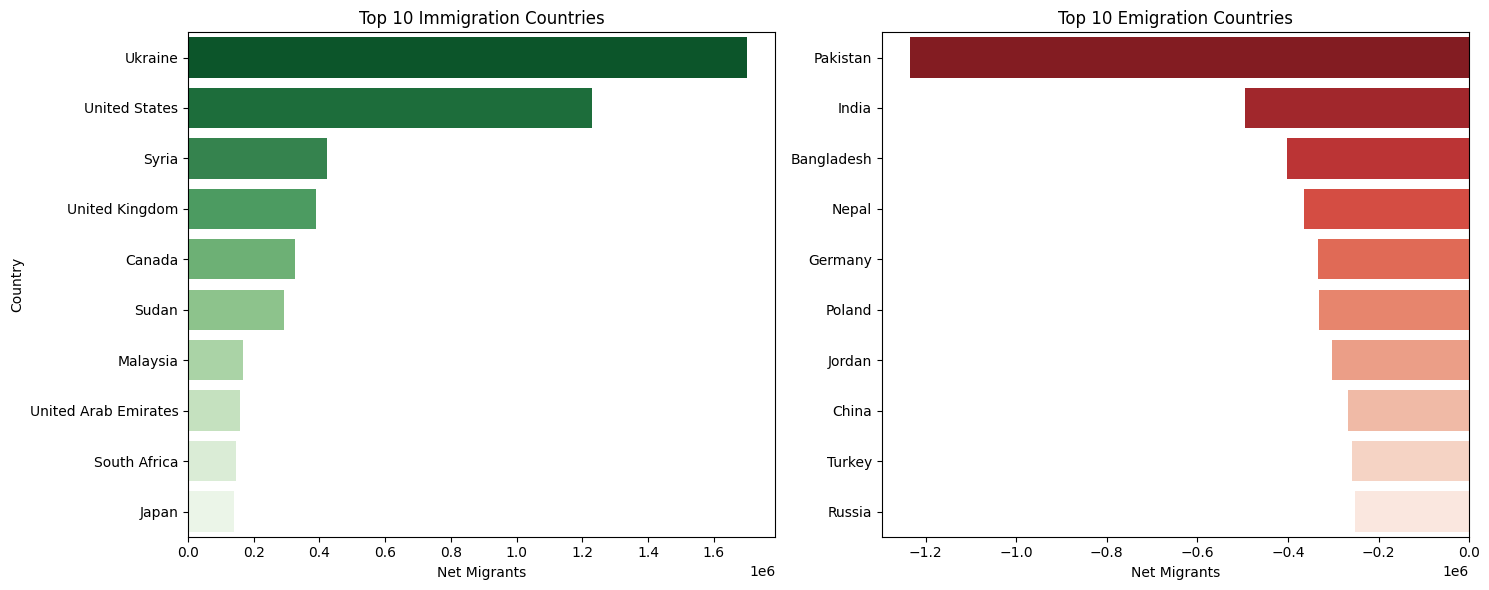

In [25]:
top_in = df.sort_values('Net_migrants', ascending=False).head(10)
top_out = df.sort_values('Net_migrants', ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(y='Country_Dependecy', x='Net_migrants', data=top_in, ax=axes[0], palette='Greens_r')
axes[0].set_title("Top 10 Immigration Countries")
axes[0].set_xlabel("Net Migrants")
axes[0].set_ylabel("Country")

sns.barplot(y='Country_Dependecy', x='Net_migrants', data=top_out, ax=axes[1], palette='Reds_r')
axes[1].set_title("Top 10 Emigration Countries")
axes[1].set_xlabel("Net Migrants")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

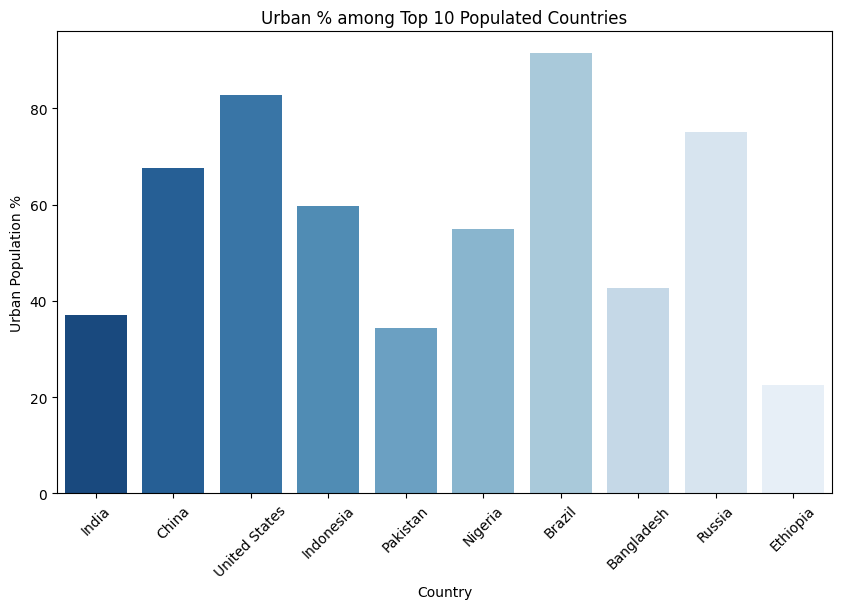

In [26]:
top_pop = df.sort_values('2025_Population_est', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Country_Dependecy', y='Percent_urban_pop', data=top_pop, palette='Blues_r')
plt.title("Urban % among Top 10 Populated Countries")
plt.xticks(rotation=45)
plt.ylabel("Urban Population %")
plt.xlabel("Country")
plt.show()

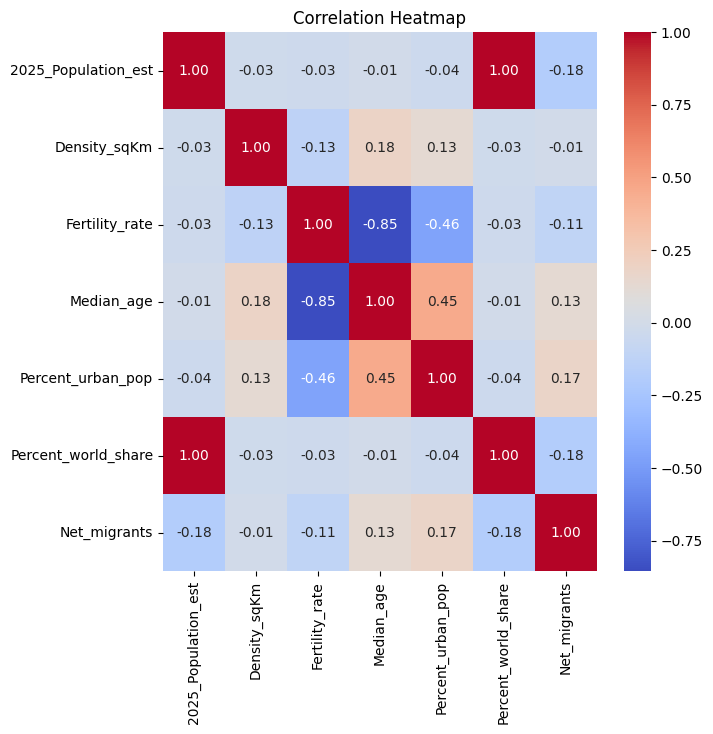

In [27]:
corr_cols = [
    '2025_Population_est', 'Density_sqKm', 'Fertility_rate',
    'Median_age', 'Percent_urban_pop', 'Percent_world_share', 'Net_migrants'
]

plt.figure(figsize=(7,7))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **Conclusion**
The analysis provides insights into global population distribution, growth dynamics, migration, and fertility patterns.

China and India remain the most populous countries, together accounting for a significant share of the world’s population. On the other hand, many small nations and dependencies have populations under one million, showing stark demographic contrasts.  

Countries in Africa and parts of Asia recorded the highest yearly growth rates, while several European nations experienced population decline or stagnation. Net migration played a critical role in shaping demographics, with Gulf countries seeing large positive inflows, while others experienced negative migration trends.  

Fertility patterns revealed that countries with high fertility rates tend to have young populations, while nations with lower fertility are experiencing aging populations. Urbanization also varied widely: some highly populated nations showed high urban percentages, while others still had a large rural presence.  

This project demonstrates the value of web scraping, data cleaning, and visualization in uncovering meaningful demographic insights and global population trends.


In [28]:
df.to_csv("world_global_population.csv",index=False, encoding="utf-8")